# Tratando outliers

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

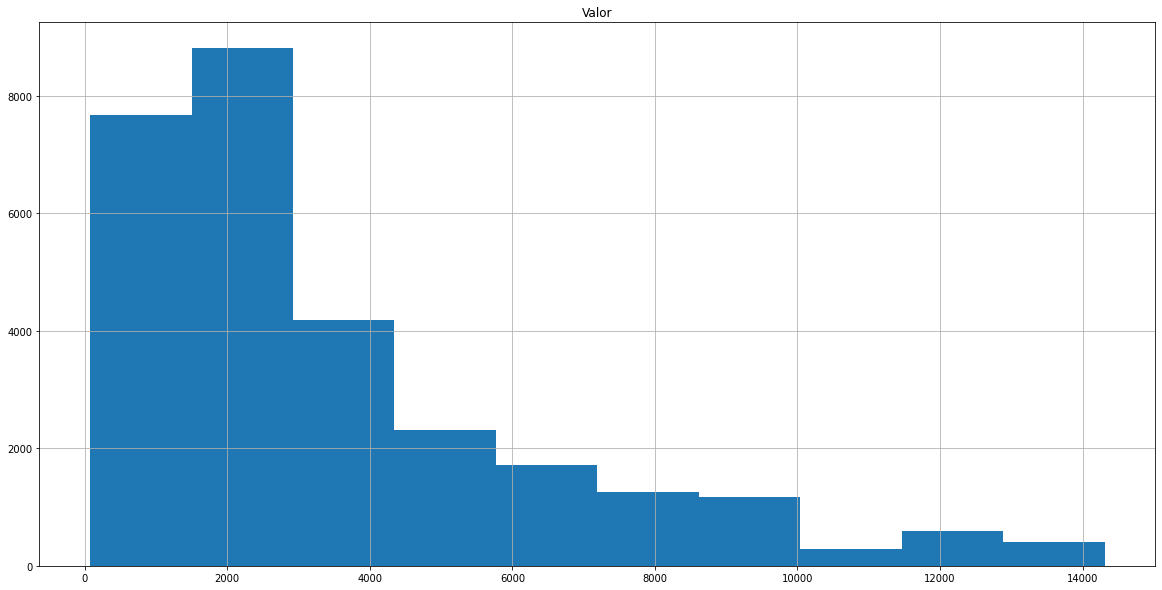

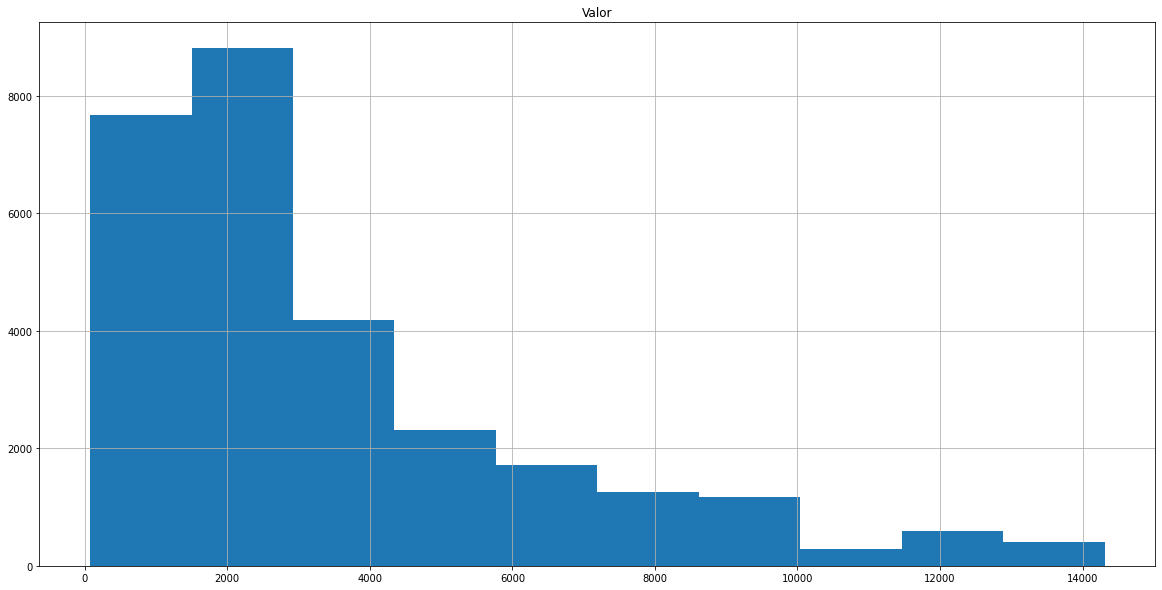

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc("figure", figsize = (20, 10))

dados = pd.read_csv("../data/aluguel_residencial.csv", sep= ";")

valor = dados['Valor']

q1 = valor.quantile(.25)
q3 = valor.quantile(.75)

box = q3 - q1

limite_inf = q1 - 1.5*box
limite_sup = q3 + 1.5*box

selecao = (valor >= limite_inf) & (valor <= limite_sup)

dados_new = dados[selecao]

dados_new2 = dados_new.query(f"Valor >= {limite_inf} and Valor <= {limite_sup} ")

dados_new2.hist(["Valor"])

dados_new.hist(["Valor"])



<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

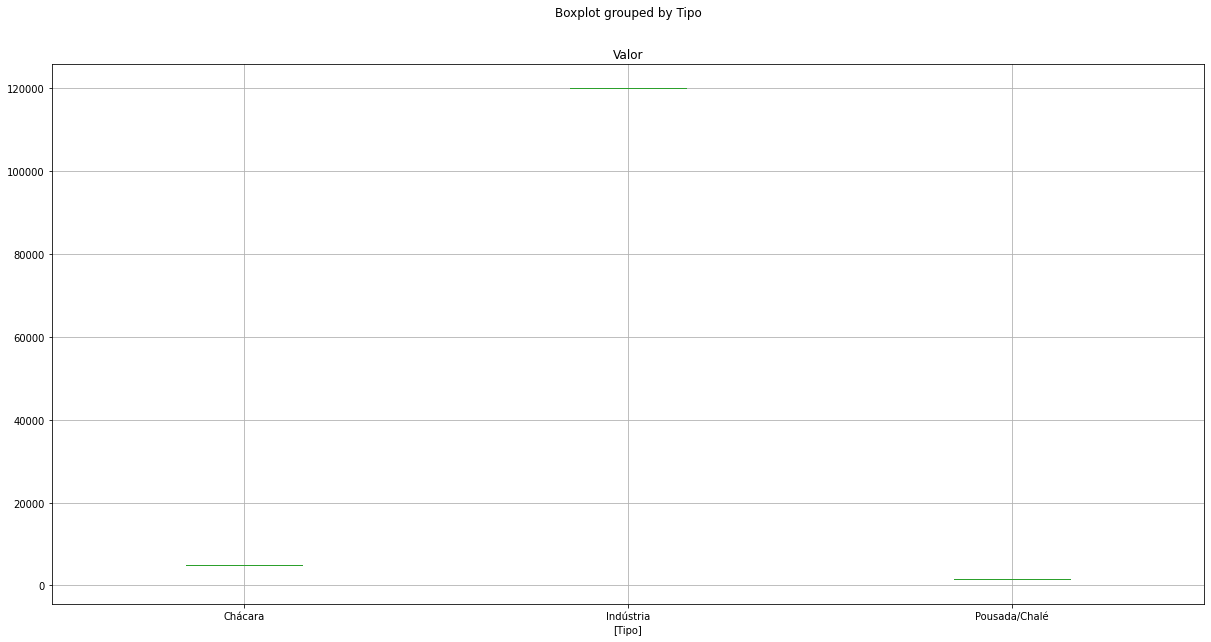

In [16]:
grupo_tipo = dados.groupby("Tipo")["Valor"]
grupo_tipo.groups

q1 =  grupo_tipo.quantile(.25)
q3 =  grupo_tipo.quantile(.75)

box = q1 - q3

lim_inferior = q1 - (1.5*box) 
lim_superior = q3 + (1.5*box )

dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados["Tipo"] == tipo
    intervalo = ((dados["Valor"] >= lim_inferior[tipo]) & (dados["Valor"]<= lim_superior[tipo])) 
    selecao = eh_tipo & intervalo
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])

dados_new.boxplot(["Valor"], by= ["Tipo"])